In [1]:
import sqlite3


In [2]:
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()


In [3]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [4]:
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 5, 1.0),
    ('Orange', 8, 1.5),
    ('Apple', 6, 2.5),
    ('Banana', 7, 1.0),
    ('Orange', 4, 1.5)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)


In [5]:
conn.commit()
conn.close()

In [6]:
import pandas as pd

# Connect to DB
conn = sqlite3.connect('sales_data.db')

# SQL Query
query = '''
    SELECT product, 
           SUM(quantity) AS total_qty, 
           SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
'''

In [8]:
df = pd.read_sql_query(query, conn)
print(df)

conn.close()


  product  total_qty  revenue
0   Apple         16     40.0
1  Banana         12     12.0
2  Orange         12     18.0


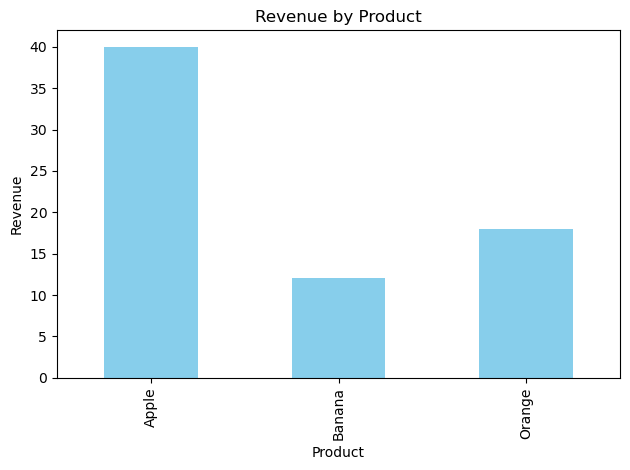

In [9]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()

# Save plot as image
plt.savefig("sales_chart.png")
plt.show()